Resnet于2015年提出，目的是解决深层网络的训练问题。一般而言，网络的性能与其深度成正比，但在实际中，深层网络一般难以训练。作者也通过实验验证，plain 34-layer的网络性能始终优于plain 50-layer的性能，作者将其称之为网络退化问题（degradation, 一般认为是梯度消失，但作者在文中指出，并未出现梯度消失问题，认为梯度消失问题基本上可以通过输入标准化与BN层解决，并猜测这种现象可能是由于深层网络收敛慢导致的）。因此，作者提出一种residual module，residual模块直接学习残差，并将模块的输入作恒等映射，两个支路进行add操作。这解决了深度网络训练困难的问题，使得在一定条件下，网络的性能与其深度成正比，同时加速了模型收敛。

Degradation如下图所示，随着网络逐渐加深，精度逐渐趋于饱和，然后快速下降，training loss也比较浅层网络高。
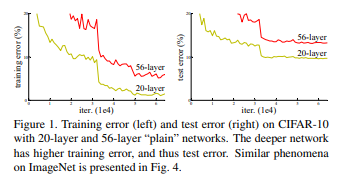

作者采用resnet来解决这个问题，不是让每个模块直接学习输入到输出的映射，而是学习残差映射。令H(x)为输入与输出间的潜在映射，让堆叠的非线性层（stacked layers）学习另一个映射：F(x) := H(x) – x，则最终的映射为F(x) + x。一般来说，学习残差比直接学习原始映射容易。
F(x) + x可以通过shortcut connection实现，如下图所示。Shortcut层实现了恒等（identity）映射，他们的输出与堆叠层输出相加。Shortcut没有引入额外参数或计算量，能够通过SGD进行优化。
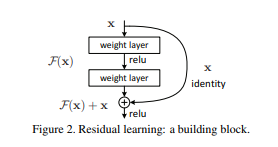

$Identity mapping: y = F(x, {Wi}) + x,其中F(x, {w})为残差映射，对于图2， F = W_2\delta(W_1x)，\\ \delta表示ReLU函数。当残差输出与模块输入维度不同时，可以做一个线性投影（linear projection）：\\ y = F(x, {w_i}) + w_s x.其中w_s用于维度匹配。$<br/>
F的形式较灵活，本文采用的形式包含两层与三层的，如下图所示。添加更多层是可能的，但如果f(x)只有一层，F(x) + x相当于线性函数，并没有作用。
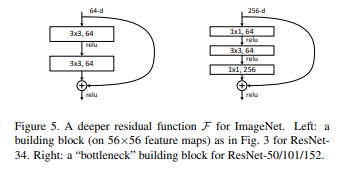

网络结构：plain network参照VGG的设计理念，卷积大多为3x3，并且遵循以下两条规则：<br/>
1)	输入与输出尺寸相同，则filter数量与输入维度相同；<br/>
2)	输出特征图尺寸减半，filter数量加倍。<br/>
Plain network与resnet结构如下：
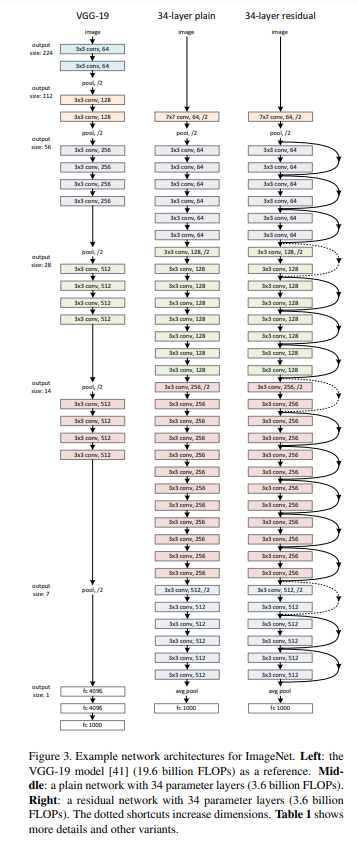

在plain network基础上，我们加入短路连接，构建resnet。当residual模块输出增加时，我们考虑两个选择：1)短路连接依然执行恒等映射，增加的维度用0填充。2)用投影短路连接，具体实现用1x1卷积。网络整体结构如下：
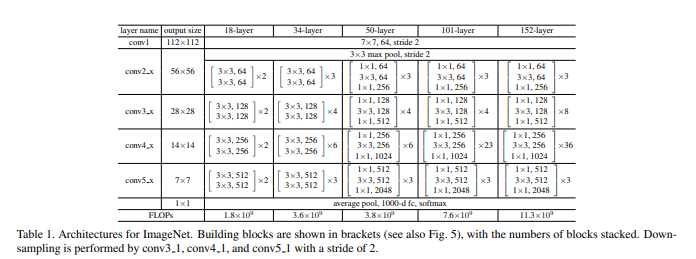

训练与测试细节：图像以最短边缩减，randomcrop from image or its horizontal flip，initial weights, weight decay, 没有用dropout, 10-crop testing.